<a href="https://colab.research.google.com/github/shreyas1209/Stock-Market-Prediction/blob/main/Stock_Market_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader,Dataset 
from torchvision import transforms
from torchvision import datasets
from math import *
from sklearn.metrics import mean_squared_error
%matplotlib inline


Loading Data for Google,Amazon and Apple Stocks

In [35]:
google_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/GOOGL_2006-01-01_to_2018-01-01.csv')
amazon_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/AMZN_2006-01-01_to_2018-01-01.csv')
apple_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/AAPL_2006-01-01_to_2018-01-01.csv')

In [36]:
print(google_data.shape)
google_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [37]:
print(amazon_data.shape)
amazon_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [38]:
print(apple_data.shape)
apple_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Plotting Data for stocks

In [39]:
google_close = google_data[['Close']]
amazon_close = amazon_data[['Close']]
apple_close  = apple_data[['Close']]

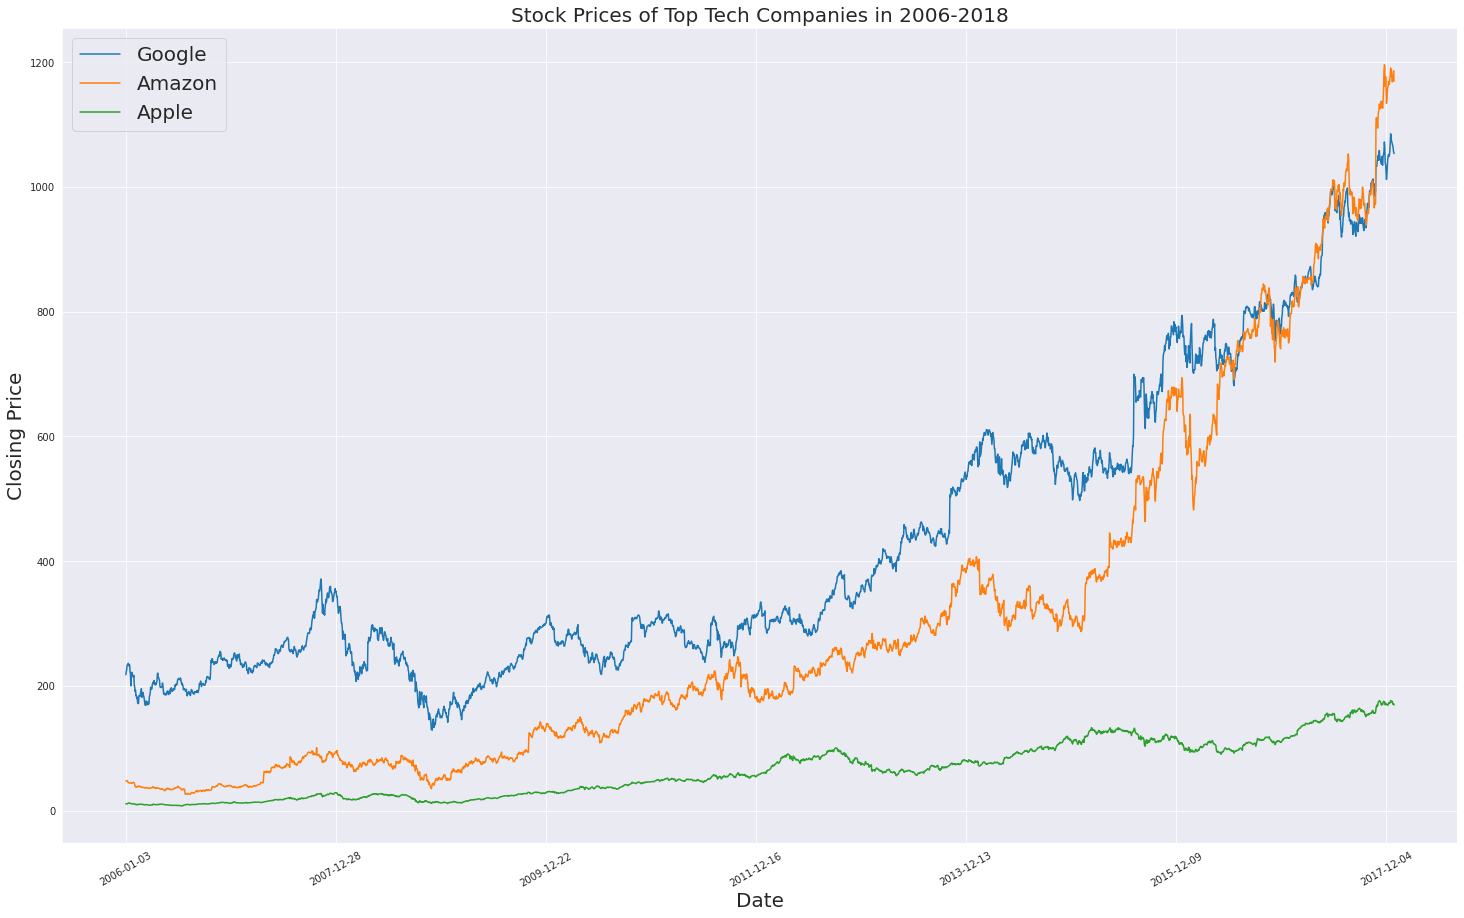

In [40]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,15))
plt.plot(google_close,label='Google')
plt.plot(amazon_close,label='Amazon')
plt.plot(apple_close,label ='Apple')
plt.xticks(range(0,google_data.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Top Tech Companies in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()


Normalizing the data

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

google_close = scaler.fit_transform(google_close.values.reshape(-1,1))
amazon_close = scaler.fit_transform(amazon_close.values.reshape(-1,1))
apple_close = scaler.fit_transform(apple_close.values.reshape(-1,1))


Splitting the train and test data

In [42]:
#use of prior time steps to predict the next time step with window_width
def train_test_split(stock,window_width,train_split_pct):
  stock_data = []
  init_data_length = len(stock)

  for i in range(init_data_length-window_width):
    data_window = stock[i:i+window_width]
    stock_data.append(data_window)
  stock_data = np.array(stock_data)
  data_size = len(stock_data)
  train_size = int(np.round(data_size*train_split_pct))
  X_train = stock_data[:train_size,:-1,:]
  y_train = stock_data[:train_size,-1,:]
    
  X_test = stock_data[train_size:,:-1]
  y_test = stock_data[train_size:,-1,:]
    
  return (X_train, y_train, X_test, y_test)
   

Splitting data for all three companies

In [43]:
google_X_train,google_y_train,google_X_test, google_y_test = train_test_split(stock = google_close,
                                                                              window_width = 20,
                                                                              train_split_pct = 0.75,
                                                                              )
google_X_train = torch.from_numpy(google_X_train.astype(np.float32))
google_y_train = torch.from_numpy(google_y_train.astype(np.float32))
google_X_test = torch.from_numpy(google_X_test.astype(np.float32))
google_y_test = torch.from_numpy(google_y_test.astype(np.float32))
print('X_train.shape = ',google_X_train.shape)
print('y_train.shape = ',google_y_train.shape)
print('X_test.shape = ',google_X_test.shape)
print('y_test.shape = ',google_y_test.shape)

X_train.shape =  torch.Size([2249, 19, 1])
y_train.shape =  torch.Size([2249, 1])
X_test.shape =  torch.Size([750, 19, 1])
y_test.shape =  torch.Size([750, 1])


In [44]:
amazon_X_train,amazon_y_train,amazon_X_test, amazon_y_test = train_test_split(stock = amazon_close,
                                                                              window_width = 20,
                                                                              train_split_pct = 0.8,
                                                                              )
amazon_X_train = torch.from_numpy(amazon_X_train.astype(np.float32))
amazon_y_train = torch.from_numpy(amazon_y_train.astype(np.float32))
amazon_X_test = torch.from_numpy(amazon_X_test.astype(np.float32))
amazon_y_test = torch.from_numpy(amazon_y_test.astype(np.float32))
print('X_train.shape = ',amazon_X_train.shape)
print('y_train.shape = ',amazon_y_train.shape)
print('X_test.shape = ',amazon_X_test.shape)
print('y_test.shape = ',amazon_y_test.shape)

X_train.shape =  torch.Size([2399, 19, 1])
y_train.shape =  torch.Size([2399, 1])
X_test.shape =  torch.Size([600, 19, 1])
y_test.shape =  torch.Size([600, 1])


In [45]:
apple_X_train,apple_y_train,apple_X_test, apple_y_test = train_test_split(stock = apple_close,
                                                                              window_width = 20,
                                                                              train_split_pct = 0.8,
                                                                              )
apple_X_train = torch.from_numpy(apple_X_train.astype(np.float32))
apple_y_train = torch.from_numpy(apple_y_train.astype(np.float32))
apple_X_test = torch.from_numpy(apple_X_test.astype(np.float32))
apple_y_test = torch.from_numpy(apple_y_test.astype(np.float32))
print('X_train.shape = ',apple_X_train.shape)
print('y_train.shape = ',apple_y_train.shape)
print('X_test.shape = ',apple_X_test.shape)
print('y_test.shape = ',apple_y_test.shape)

X_train.shape =  torch.Size([2399, 19, 1])
y_train.shape =  torch.Size([2399, 1])
X_test.shape =  torch.Size([600, 19, 1])
y_test.shape =  torch.Size([600, 1])


In [46]:
import sys
sys.path.append('/content/drive/MyDrive/Stock_market_prediction/notebooks')
from stock_market_models import *
from stock_market_train import *

In [47]:
input_size = 1
hidden_size = 32
output_size = 1



In [48]:
model = LSTM(input_size = input_size,hidden_size = hidden_size,output_size = output_size)

In [49]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 125

Training the data for Google

In [50]:
google_train_pred = train(google_X_train,google_y_train,model,loss_func,optimizer,epochs=epochs)

Epoch  1 Loss:  0.3005264401435852 Time:  0.4582733869999913
Epoch  2 Loss:  0.1917690932750702 Time:  0.29477680600001577
Epoch  3 Loss:  0.10235083103179932 Time:  0.30747751399999856
Epoch  4 Loss:  0.055906906723976135 Time:  0.30657972200000927
Epoch  5 Loss:  0.11753175407648087 Time:  0.32753058599999463
Epoch  6 Loss:  0.06412394344806671 Time:  0.27805703800001424
Epoch  7 Loss:  0.051858220249414444 Time:  0.2932974470000147
Epoch  8 Loss:  0.060486502945423126 Time:  0.3091223399999876
Epoch  9 Loss:  0.06773865222930908 Time:  0.3070189350000021
Epoch  10 Loss:  0.06877462565898895 Time:  0.2841771319999964
Epoch  11 Loss:  0.06441695243120193 Time:  0.31067532700001266
Epoch  12 Loss:  0.05685362219810486 Time:  0.28115242200001944
Epoch  13 Loss:  0.04883826524019241 Time:  0.27779690200000573
Epoch  14 Loss:  0.043572016060352325 Time:  0.2823938809999902
Epoch  15 Loss:  0.04371407628059387 Time:  0.28628323800001
Epoch  16 Loss:  0.047884076833724976 Time:  0.285160837

In [51]:
amazon_train_pred=train(amazon_X_train,amazon_y_train,model,loss_func,optimizer,epochs=epochs)

Epoch  1 Loss:  0.0002113471127813682 Time:  0.3030045239999879
Epoch  2 Loss:  0.0001873679575510323 Time:  0.3081426439999859
Epoch  3 Loss:  0.0002069056499749422 Time:  0.3152662940000255
Epoch  4 Loss:  0.00018637366883922368 Time:  0.3016838519999965
Epoch  5 Loss:  0.00018795556388795376 Time:  0.3029952580000099
Epoch  6 Loss:  0.00019281808636151254 Time:  0.2893792989999895
Epoch  7 Loss:  0.00017714686691761017 Time:  0.29713338400000566
Epoch  8 Loss:  0.00019026774680241942 Time:  0.3076404949999869
Epoch  9 Loss:  0.00017872313037514687 Time:  0.3117244530000107
Epoch  10 Loss:  0.00018025646568275988 Time:  0.3008981419999941
Epoch  11 Loss:  0.00018183037173002958 Time:  0.30779420799999
Epoch  12 Loss:  0.00017219768778886646 Time:  0.3038552640000205
Epoch  13 Loss:  0.00017937939264811575 Time:  0.2980394270000204
Epoch  14 Loss:  0.00017085175204556435 Time:  0.3093269620000001
Epoch  15 Loss:  0.000173623877344653 Time:  0.2978578540000001
Epoch  16 Loss:  0.000173

In [52]:

apple_train_pred=train(apple_X_train,apple_y_train,model,loss_func,optimizer,epochs=epochs)

Epoch  1 Loss:  0.004661956802010536 Time:  0.3050672880000036
Epoch  2 Loss:  0.0034071917179971933 Time:  0.30053007000000775
Epoch  3 Loss:  0.001771103241480887 Time:  0.33340461399998844
Epoch  4 Loss:  0.0008113488438539207 Time:  0.3320333270000049
Epoch  5 Loss:  0.0009515819256193936 Time:  0.31925103899999385
Epoch  6 Loss:  0.0009345541475340724 Time:  0.2990201789999958
Epoch  7 Loss:  0.001232612761668861 Time:  0.3014680439999893
Epoch  8 Loss:  0.0007294283714145422 Time:  0.29435194300000944
Epoch  9 Loss:  0.0007976048509590328 Time:  0.30286992699998905
Epoch  10 Loss:  0.000483729992993176 Time:  0.31474493300001427
Epoch  11 Loss:  0.0007336487178690732 Time:  0.3001973159999807
Epoch  12 Loss:  0.0007609057938680053 Time:  0.3171416380000096
Epoch  13 Loss:  0.0008206450147554278 Time:  0.3160420229999943
Epoch  14 Loss:  0.0007160860695876181 Time:  0.3174576229999957
Epoch  15 Loss:  0.0005109616322442889 Time:  0.29190584799999897
Epoch  16 Loss:  0.000477245019

In [53]:

google_train_predict = pd.DataFrame(scaler.inverse_transform(google_train_pred.detach().numpy()))
amazon_train_predict = pd.DataFrame(scaler.inverse_transform(amazon_train_pred.detach().numpy()))
apple_train_predict = pd.DataFrame(scaler.inverse_transform(apple_train_pred.detach().numpy()))



In [54]:
google_close_train = pd.DataFrame(scaler.inverse_transform(google_y_train.detach().numpy()))
amazon_close_train = pd.DataFrame(scaler.inverse_transform(amazon_y_train.detach().numpy()))
apple_close_train = pd.DataFrame(scaler.inverse_transform(apple_y_train.detach().numpy()))

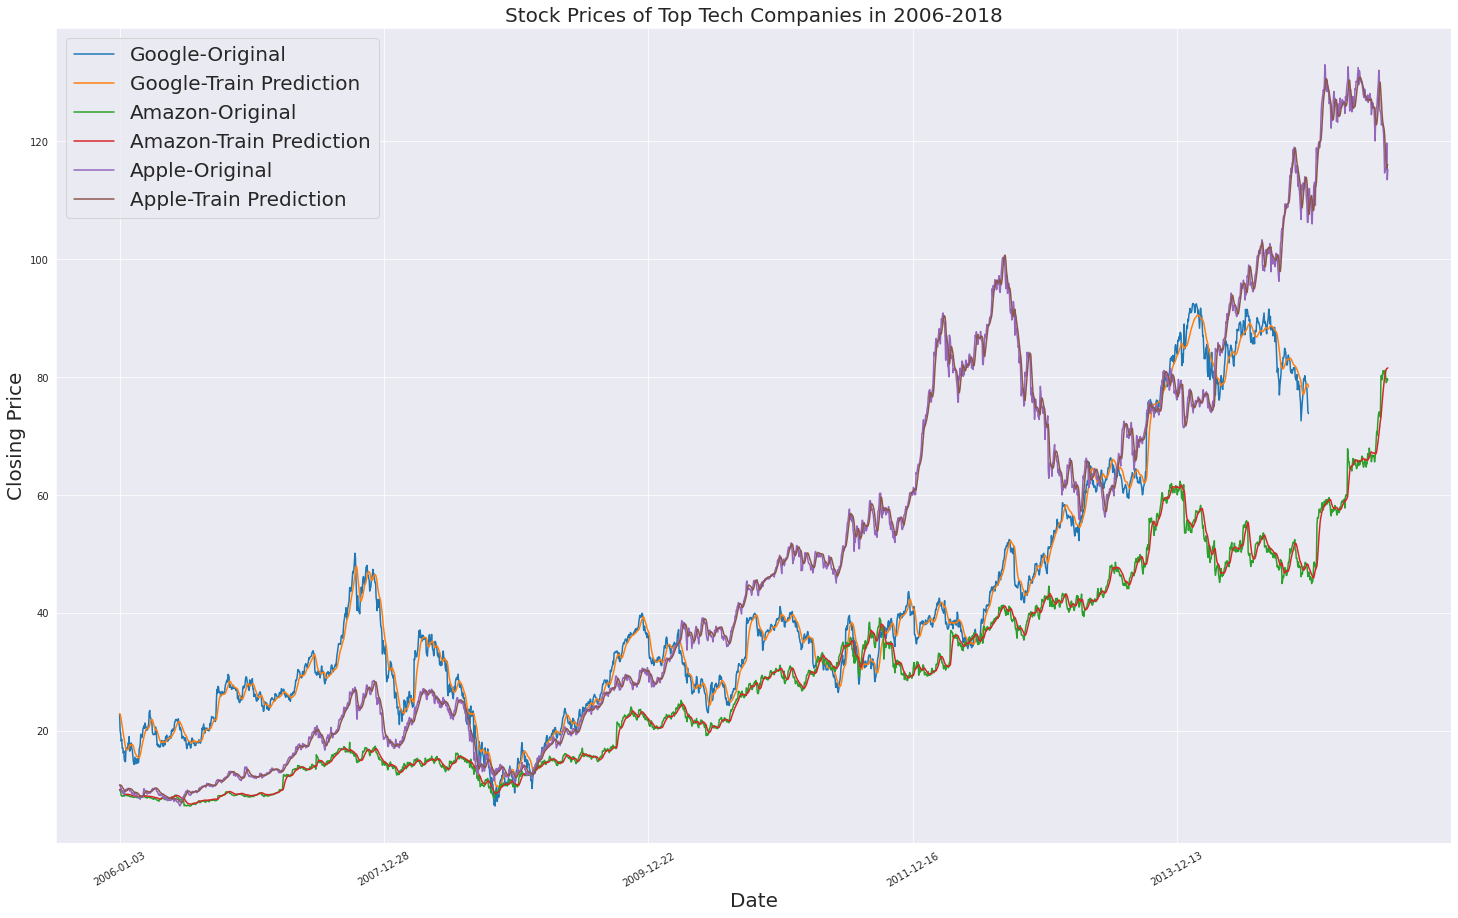

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,15))
plt.plot(google_close_train,label='Google-Original')
plt.plot(google_train_predict,label='Google-Train Prediction')

plt.plot(amazon_close_train,label='Amazon-Original')
plt.plot(amazon_train_predict,label='Amazon-Train Prediction')


plt.plot(apple_close_train,label ='Apple-Original')
plt.plot(apple_train_predict,label ='Apple-Train Prediction')

plt.xticks(range(0,google_close_train.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Top Tech Companies in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()

Predicting on the test data

In [56]:
google_test_pred = model(google_X_test)
amazon_test_pred = model(amazon_X_test)
apple_test_pred = model(apple_X_test)


In [57]:
google_test_predict = pd.DataFrame(scaler.inverse_transform(google_test_pred.detach().numpy()))
amazon_test_predict = pd.DataFrame(scaler.inverse_transform(amazon_test_pred.detach().numpy()))
apple_test_predict = pd.DataFrame(scaler.inverse_transform(apple_test_pred.detach().numpy()))


In [58]:
google_close_test = pd.DataFrame(scaler.inverse_transform(google_y_test.detach().numpy()))
amazon_close_test = pd.DataFrame(scaler.inverse_transform(amazon_y_test.detach().numpy()))
apple_close_test = pd.DataFrame(scaler.inverse_transform(apple_y_test.detach().numpy()))


In [59]:
google_train_score = sqrt(mean_squared_error(google_train_predict[:], google_close_train[:]))
print('Google Train Score:{} RMS error'.format(google_train_score))
google_test_score = sqrt(mean_squared_error(google_test_predict[:], google_close_test[:]))
print('Google Test Score: {} RMS error'.format(google_test_score))

Google Train Score:1.7365053170142257 RMS error
Google Test Score: 3.8937844313175325 RMS error


In [60]:
amazon_train_score = sqrt(mean_squared_error(amazon_train_predict[:], amazon_close_train[:]))
print('Amazon Train Score:{} RMS error'.format(amazon_train_score))
amazon_test_score = sqrt(mean_squared_error(amazon_test_predict[:], amazon_close_test[:]))
print('Amazon Test Score: {} RMS error'.format(amazon_test_score))

Amazon Train Score:1.0162915903287186 RMS error
Amazon Test Score: 3.7347628978555307 RMS error


In [61]:
apple_train_score = sqrt(mean_squared_error(apple_train_predict[:], apple_close_train[:]))
print('Apple Train Score:{} RMS error'.format(apple_train_score))
apple_test_score = sqrt(mean_squared_error(apple_test_predict[:], apple_close_test[:]))
print('Apple Test Score: {} RMS error'.format(apple_test_score))

Apple Train Score:1.4162139543220522 RMS error
Apple Test Score: 4.080846820913134 RMS error


In [62]:
google_original = np.append(google_close_train, google_close_test, axis=0)
amazon_original = np.append(amazon_close_train, amazon_close_test, axis=0)
apple_original = np.append(apple_close_train, apple_close_test, axis=0)


In [63]:
google_predicted = np.append(google_train_predict,google_test_predict,axis=0)
amazon_predicted = np.append(amazon_train_predict,amazon_test_predict,axis=0)
apple_predicted = np.append(apple_train_predict,apple_test_predict,axis=0)

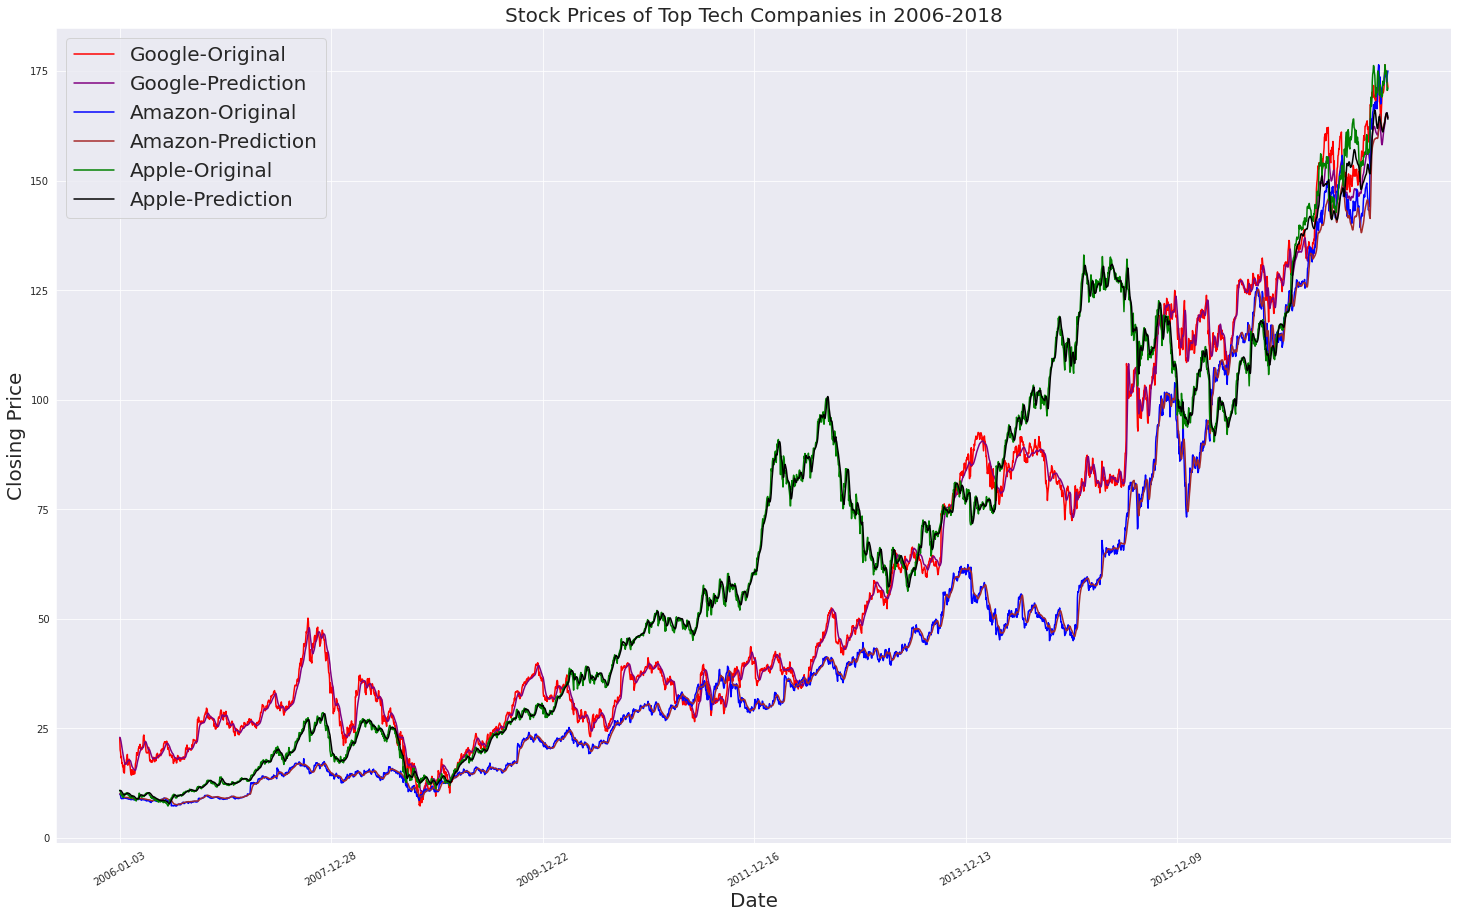

In [64]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,15))
plt.plot(google_original,label='Google-Original',color='red')
plt.plot(google_predicted,label='Google-Prediction',color= 'purple')

plt.plot(amazon_original,label='Amazon-Original',color = 'blue')
plt.plot(amazon_predicted,label='Amazon-Prediction', color ='brown')


plt.plot(apple_original,label ='Apple-Original',color = 'green')
plt.plot(apple_predicted,label ='Apple-Prediction',color='black')

plt.xticks(range(0,google_original.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Top Tech Companies in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()

Better visualisation

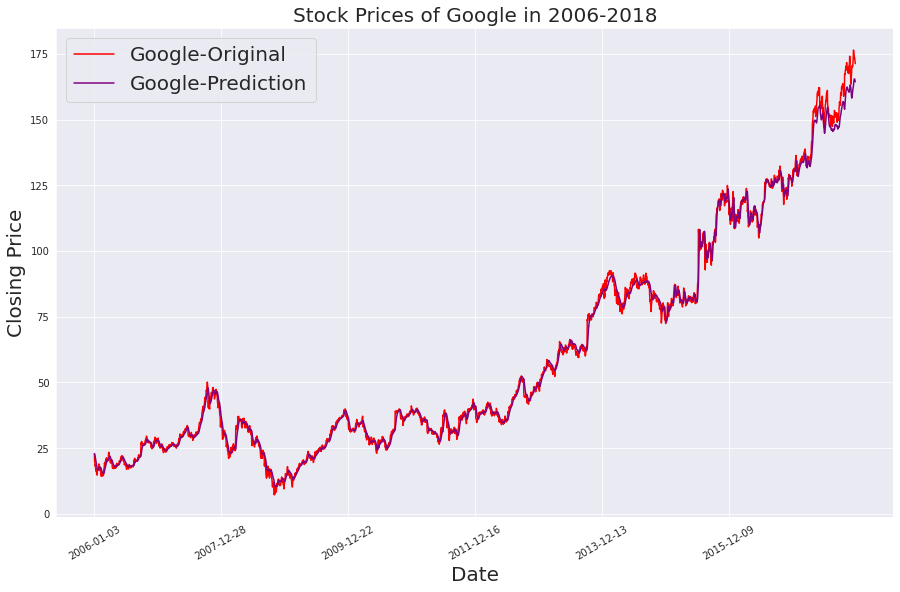

In [72]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(google_original,label='Google-Original',color='red')
plt.plot(google_predicted,label='Google-Prediction',color= 'purple')
plt.xticks(range(0,google_original.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Google in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()

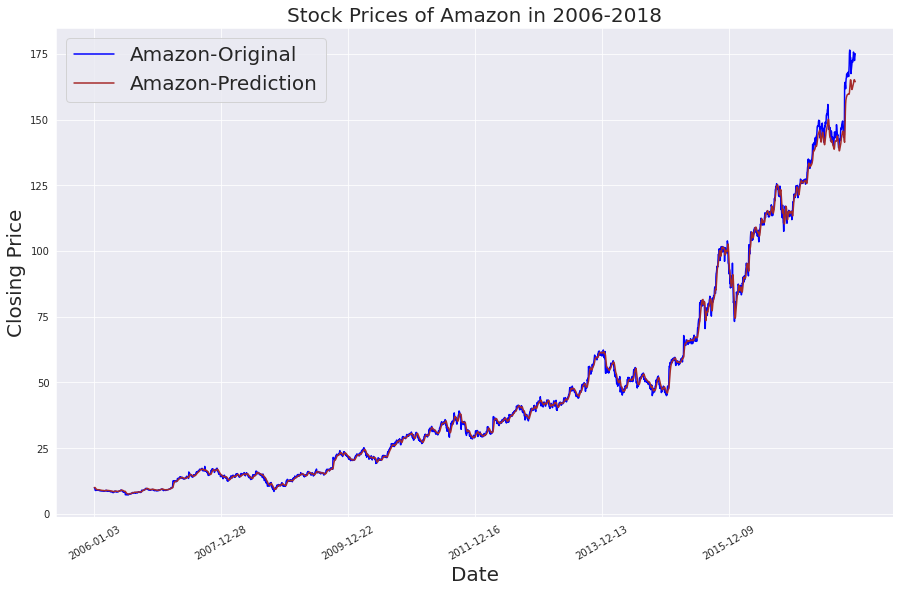

In [73]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(amazon_original,label='Amazon-Original',color = 'blue')
plt.plot(amazon_predicted,label='Amazon-Prediction', color ='brown')

plt.xticks(range(0,google_original.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Amazon in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()

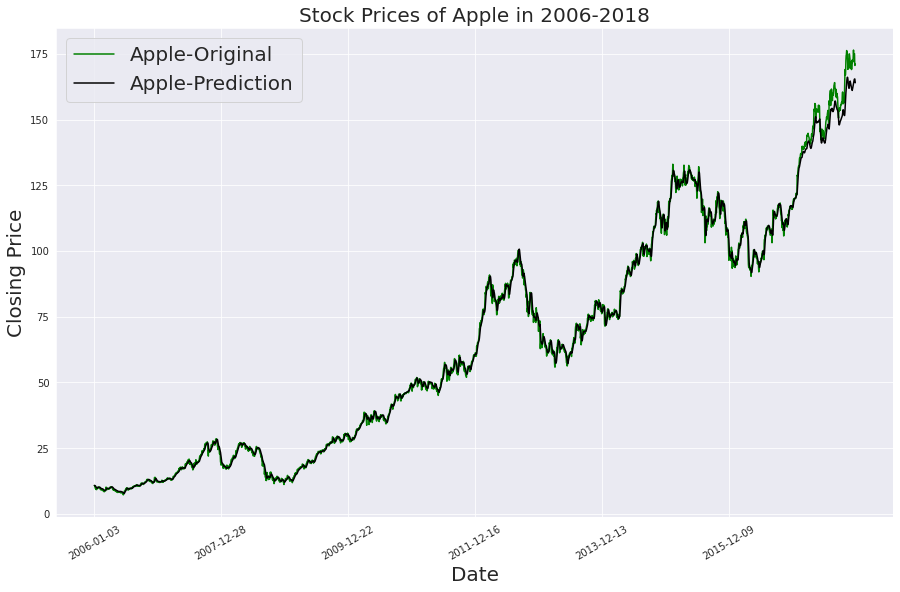

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(apple_original,label ='Apple-Original',color = 'green')
plt.plot(apple_predicted,label ='Apple-Prediction',color='black')

plt.xticks(range(0,google_original.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Apple in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()